<a href="https://colab.research.google.com/github/luisbelb39-dot/Inteligencia-Artificial/blob/main/CNN_Clasificaci%C3%B3n_de_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # Se usa para manejar arreglos y operaciones numéricas.
import tensorflow as tf  # Librería principal para construir y entrenar redes neuronales.
from tensorflow.keras.models import Sequential  # Permite crear modelos secuenciales capa por capa.
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax  # Capas necesarias para la CNN.
from tensorflow.keras.optimizers import Adam  # Optimizador Adam para ajustar los pesos del modelo.
from tensorflow.keras.datasets import fashion_mnist  # Dataset con imágenes de ropa (camisetas, zapatos, etc.).
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # Función de pérdida para clasificación multiclase.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Para evaluar el modelo con una matriz de confusión.
import seaborn as sns  # Librería para visualizaciones más atractivas.
import matplotlib.pyplot as plt  # Usada para graficar resultados e imágenes.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist # cargar data set

In [3]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
index = 10  # Asigna el valor 10 como índice para seleccionar un elemento específico.


In [9]:
image = train_images[index]  # Guarda la imagen ubicada en la posición indicada.
label = train_labels[index]  # Guarda la etiqueta (clase real) correspondiente a esa imagen.


In [10]:
print(image)  # Muestra los valores de los píxeles de la imagen seleccionada.


[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

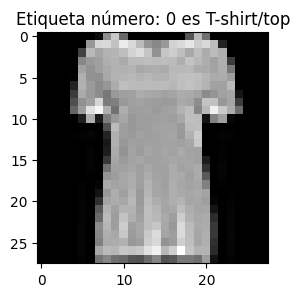

In [11]:
plt.figure(figsize=(3, 3))  # Define el tamaño de la figura.
plt.imshow(image, cmap=plt.cm.gray)  # Muestra la imagen en escala de grises.
plt.title(f'Etiqueta número: {label} es {class_names[label]}')  # Muestra el número de etiqueta y su nombre.
plt.show()  # Muestra la imagen en pantalla.


In [12]:
print(train_images.shape)  # Muestra las dimensiones del conjunto de entrenamiento.
print(test_images.shape)   # Muestra las dimensiones del conjunto de prueba.


(60000, 28, 28)
(10000, 28, 28)


In [13]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
# Crea el modelo de red neuronal convolucional (CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Primera capa convolucional con 32 filtros.
    MaxPooling2D((2, 2)),  # Reduce el tamaño de la imagen a la mitad.
    Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional con 64 filtros.
    MaxPooling2D((2, 2)),  # Segunda capa de reducción de tamaño.
    Conv2D(64, (3, 3), activation='relu'),  # Tercera capa convolucional.
    Flatten(),  # Convierte los datos en un vector unidimensional.
    Dense(64, activation='relu'),  # Capa densa con 64 neuronas y activación ReLU.
    Dense(10)  # Capa de salida con 10 neuronas (una por cada clase del dataset).
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Define la tasa de aprendizaje y el optimizador
learning_rate = 0.001  # Establece la tasa de aprendizaje.
adam_optimizer = Adam(learning_rate=learning_rate)  # Crea el optimizador Adam con esa tasa.


In [16]:
model.compile(  # Configura el modelo antes de entrenarlo.
    optimizer=adam_optimizer,  # Usa el optimizador Adam con la tasa de aprendizaje definida.
    loss=SparseCategoricalCrossentropy(from_logits=True),  # Función de pérdida para etiquetas enteras.
    metrics=['accuracy']  # Mide la precisión del modelo durante el entrenamiento.
)


In [17]:
model.fit(  # Entrena el modelo con los datos de entrenamiento.
    train_images, train_labels,
    epochs=10,  # Número de veces que el modelo verá todos los datos.
    validation_data=(test_images, test_labels)  # Usa los datos de prueba para validar el desempeño.
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.7509 - loss: 0.6915 - val_accuracy: 0.8720 - val_loss: 0.3514
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.8826 - loss: 0.3252 - val_accuracy: 0.8786 - val_loss: 0.3258
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8989 - loss: 0.2755 - val_accuracy: 0.8941 - val_loss: 0.3024
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9115 - loss: 0.2389 - val_accuracy: 0.9009 - val_loss: 0.2742
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9177 - loss: 0.2172 - val_accuracy: 0.9030 - val_loss: 0.2753
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9276 - loss: 0.1947 - val_accuracy: 0.9025 - val_loss: 0.2647
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9326 - loss: 0.1793 - val_accuracy: 0.9063 - val_loss: 0.2620
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9407 -

In [18]:
# Evalúa el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  # Calcula la pérdida y precisión en el conjunto de prueba.


313/313 - 3s - 9ms/step - accuracy: 0.9076 - loss: 0.2797


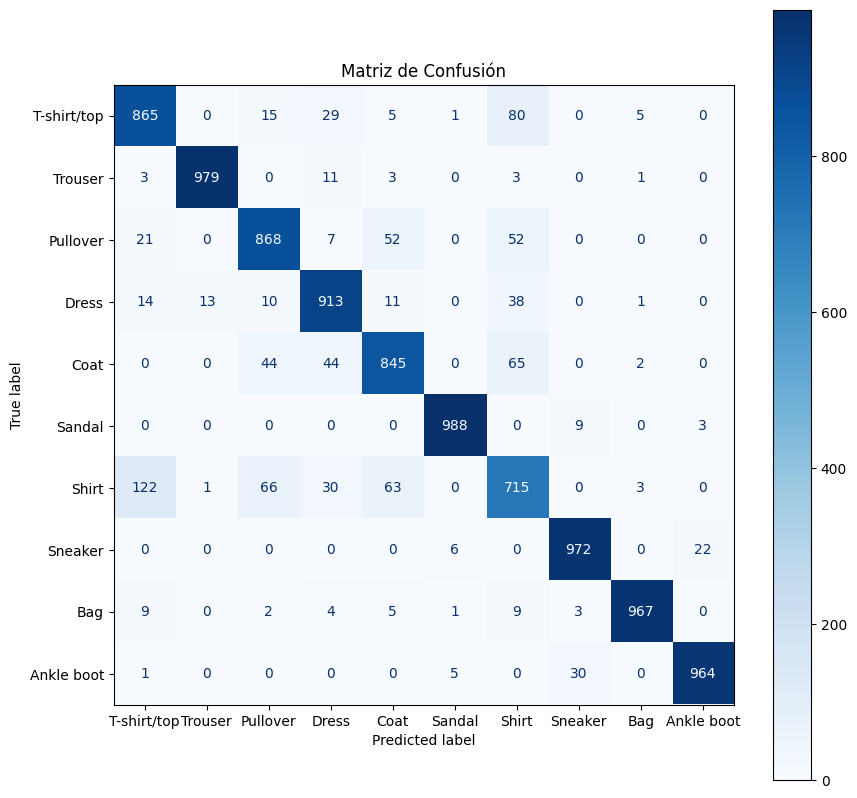

In [24]:
# Graficar matriz de confusión

# Obtener las etiquetas predichas a partir de las predicciones del modelo
predicted_labels = np.argmax(predictions, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)

# Crear un objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


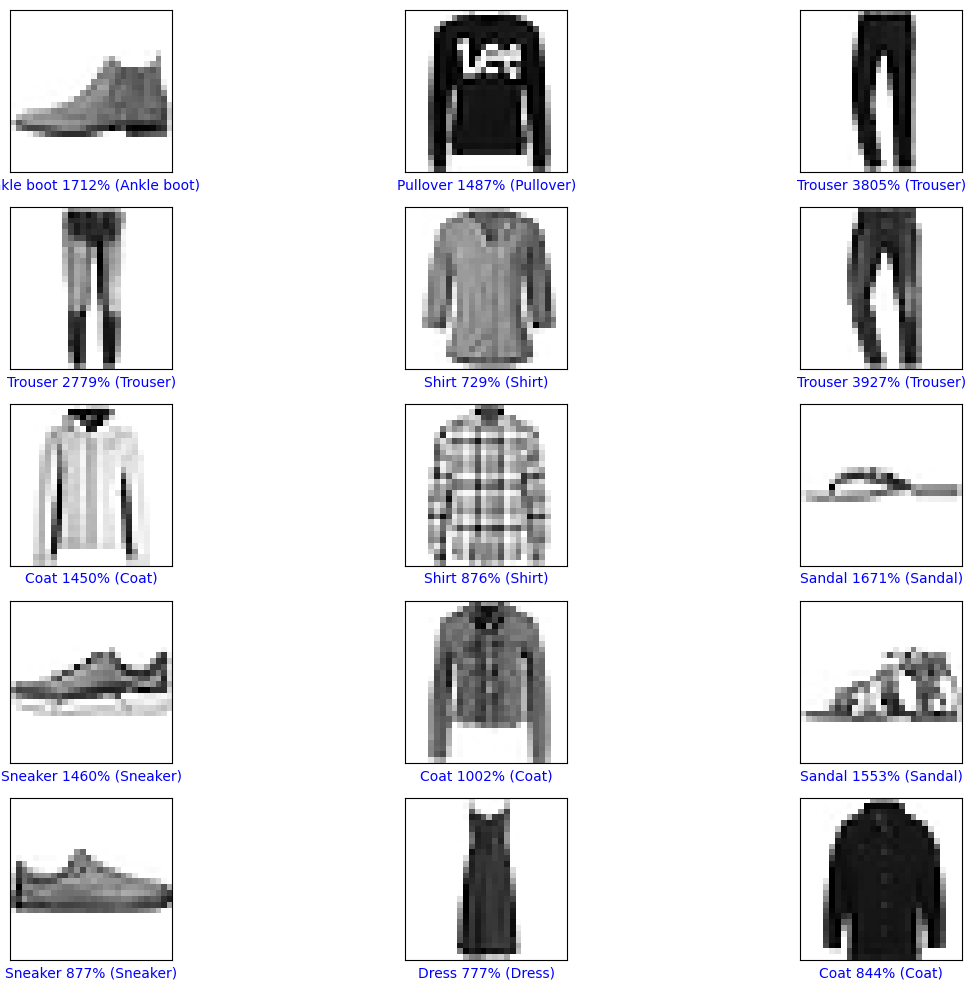

In [22]:
def plot_image(i, predictions_array, true_label, img):  # Función para mostrar una imagen con su predicción.
    true_label, img = true_label[i], img[i]
    plt.grid(False)  # Quita la cuadrícula.
    plt.xticks([])  # Quita las marcas del eje X.
    plt.yticks([])  # Quita las marcas del eje Y.

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)  # Muestra la imagen en blanco y negro.

    predicted_label = tf.argmax(predictions_array).numpy()  # Obtiene la clase con mayor probabilidad.
    if predicted_label == true_label:
        color = 'blue'  # Azul si la predicción es correcta.
    else:
        color = 'red'  # Rojo si la predicción es incorrecta.

    plt.xlabel("{} {:2.0f}% ({})".format(  # Muestra el nombre de la clase predicha, el porcentaje y la clase real.
        class_names[predicted_label],
        100*tf.reduce_max(predictions_array).numpy(),
        class_names[true_label]),
        color=color)

# Nombres de las clases del dataset Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predecir las etiquetas para las imágenes de prueba
predictions = model.predict(test_images.reshape(-1, 28, 28, 1)) # Reshape to add channel dimension

# Muestra varias predicciones con sus imágenes
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))  # Define el tamaño del gráfico.

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)  # Posición de cada imagen en la cuadrícula.
    plot_image(i, predictions[i], test_labels, test_images)  # Llama a la función para graficar cada imagen.

plt.tight_layout()  # Ajusta los espacios entre las imágenes.
plt.show()  # Muestra las imágenes con las predicciones.